# Figuring Our Which Customers May Leave - Churn Analysis

### About our Dataset
Source - https://www.kaggle.com/blastchar/telco-customer-churn
1. We have customer information for a Telecommunications company
2. We've got customer IDs, general customer info, the servies they've subscribed too, type of contract and monthly charges.
3. This is a historic customer information so we have a field stating whether that customer has **churnded** 
**Field Descriptions**
- customerID - Customer ID
- gender - Whether the customer is a male or a female
- SeniorCitizen - Whether the customer is a senior citizen or not (1, 0)
- Partner - Whether the customer has a partner or not (Yes, No)
- Dependents - Whether the customer has dependents or not (Yes, No)
- tenure - Number of months the customer has stayed with the company
- PhoneService - Whether the customer has a phone service or not (Yes, No)
- MultipleLines - Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService - Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection - Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport - Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV - Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies - Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract - The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod - The customer’s payment method (Electronic check, Mailed check Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges - The amount charged to the customer monthly
- TotalCharges - The total amount charged to the customer
- Churn - Whether the customer churned or not (Yes or No)

***Customer Churn*** - churn is when an existing customer, user, player, subscriber or any kind of return client stops doing business or ends the relationship with a company.

**Aim -** is to figure our which customers may likely churn in future

In [1]:
#import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
sns.set()

#loading data

df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Descriptive Analysis

In [2]:
print(df.describe())
print(df.info())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines  

In [3]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [4]:
#summarizing the dataset
print('Number of rows:', df.shape[0])
print('\nNumber of columns:', df.shape[1])
print('\nfeatures:\n', df.columns.tolist())
print('\nUnique Values:\n', df.nunique())
print('\nMissing Values:', df.isnull().sum().values.sum())

Number of rows: 7043

Number of columns: 21

features:
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Unique Values:
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Missing Values: 0


### Exploratory Analysis

In [5]:
#Number of customers that left vs those that did not
a = df['Churn'].value_counts()
print('Total Number of customers: ', df.shape[0])
print('Total Number of customers that churned:', a[1])
print('Percentage of customers that churned:', format((a[1]/df.shape[0])*100, '.2f'),'%')
a

Total Number of customers:  7043
Total Number of customers that churned: 1869
Percentage of customers that churned: 26.54 %


No     5174
Yes    1869
Name: Churn, dtype: int64

In [6]:
#Creating a checkpoint before making changes to dataset
df_churn = df.copy()
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df_churn.drop(["customerID", "MonthlyCharges", "TotalCharges", "tenure"], axis=1, inplace=True)
df_churn

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [8]:
#summary table
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [9]:
summary = pd.concat([pd.crosstab(df_churn[x], df_churn.Churn) for x in df_churn.columns[:-1]], keys=df_churn.columns[:-1])
summary

Churn                                         No   Yes
gender           Female                     2549   939
                 Male                       2625   930
SeniorCitizen    0                          4508  1393
                 1                           666   476
Partner          No                         2441  1200
                 Yes                        2733   669
Dependents       No                         3390  1543
                 Yes                        1784   326
PhoneService     No                          512   170
                 Yes                        4662  1699
MultipleLines    No                         2541   849
                 No phone service            512   170
                 Yes                        2121   850
InternetService  DSL                        1962   459
                 Fiber optic                1799  1297
                 No                         1413   113
OnlineSecurity   No                         2037  1461
                 No internet service        1413   113
                 Yes                        1724   295
OnlineBackup     No                         1855  1233
                 No internet service        1413   113
                 Yes                        1906   523
DeviceProtection No                         1884  1211
                 No internet service        1413   113
                 Yes                        1877   545
TechSupport      No                         2027  1446
                 No internet service        1413   113
                 Yes                        1734   310
StreamingTV      No                         1868   942
                 No internet service        1413   113
                 Yes                        1893   814
StreamingMovies  No                         1847   938
                 No internet service        1413   113
                 Yes                        1914   818
Contract         Month-to-month             2220  1655
                 One year                   1307   166
                 Two year                   1647    48
PaperlessBilling No                         2403   469
                 Yes                        2771  1400
PaymentMethod    Bank transfer (automatic)  1286   258
                 Credit card (automatic)    1290   232
                 Electronic check           1294  1071
                 Mailed check               1304   308

In [10]:
#Percentage Churn
summary['Churn_Percentage'] = summary['Yes'] / (summary['No'] + summary['Yes'])
summary

Churn                                         No   Yes  Churn_Percentage
gender           Female                     2549   939          0.269209
                 Male                       2625   930          0.261603
SeniorCitizen    0                          4508  1393          0.236062
                 1                           666   476          0.416813
Partner          No                         2441  1200          0.329580
                 Yes                        2733   669          0.196649
Dependents       No                         3390  1543          0.312791
                 Yes                        1784   326          0.154502
PhoneService     No                          512   170          0.249267
                 Yes                        4662  1699          0.267096
MultipleLines    No                         2541   849          0.250442
                 No phone service            512   170          0.249267
                 Yes                        2121   850          0.286099
InternetService  DSL                        1962   459          0.189591
                 Fiber optic                1799  1297          0.418928
                 No                         1413   113          0.074050
OnlineSecurity   No                         2037  1461          0.417667
                 No internet service        1413   113          0.074050
                 Yes                        1724   295          0.146112
OnlineBackup     No                         1855  1233          0.399288
                 No internet service        1413   113          0.074050
                 Yes                        1906   523          0.215315
DeviceProtection No                         1884  1211          0.391276
                 No internet service        1413   113          0.074050
                 Yes                        1877   545          0.225021
TechSupport      No                         2027  1446          0.416355
                 No internet service        1413   113          0.074050
                 Yes                        1734   310          0.151663
StreamingTV      No                         1868   942          0.335231
                 No internet service        1413   113          0.074050
                 Yes                        1893   814          0.300702
StreamingMovies  No                         1847   938          0.336804
                 No internet service        1413   113          0.074050
                 Yes                        1914   818          0.299414
Contract         Month-to-month             2220  1655          0.427097
                 One year                   1307   166          0.112695
                 Two year                   1647    48          0.028319
PaperlessBilling No                         2403   469          0.163301
                 Yes                        2771  1400          0.335651
PaymentMethod    Bank transfer (automatic)  1286   258          0.167098
                 Credit card (automatic)    1290   232          0.152431
                 Electronic check           1294  1071          0.452854
                 Mailed check               1304   308          0.191067

### Visualizations and EDA

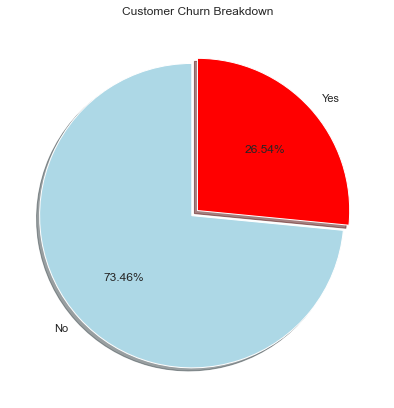

In [11]:
#plot a pie chart of the churn percentage
labels = df_churn['Churn'].value_counts(sort = True).index
sizes = df_churn['Churn'].value_counts(sort = True)

colors = ["lightblue", "red"]
explode = (0.05,0) #explodes first slice

rcParams['figure.figsize'] = 7,7
#Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct= '%1.2f%%', shadow=True, startangle=90,)

plt.title('Customer Churn Breakdown')
plt.show()

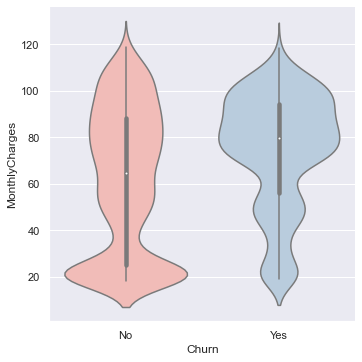

In [12]:
#We will create a violin Plot showing how monthly charges relate to Churn, from this we will see that
#churned customers tend to be higher paying customers
g = sns.catplot(x="Churn", y="MonthlyCharges", data = df, kind="violin", palette = "Pastel1")

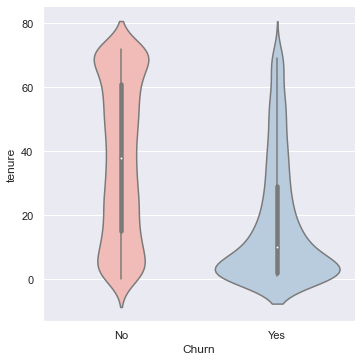

In [13]:
#Let's see the relationship between tenure and Churn
g = sns.catplot(x="Churn", y="tenure", data = df, kind="violin", palette = "Pastel1")

In [14]:
#before developing the correlation matrix let's convert the totalcharges column to int
df2 = df[df['TotalCharges'] != " "]
empty_cells = df['TotalCharges'] == " "
#empty_cells.value_counts()
df2['TotalCharges'] = df2['TotalCharges'].astype(float)
df2['TotalCharges'].dtype

<ipython-input-14-11853faafff2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TotalCharges'] = df2['TotalCharges'].astype(float)


dtype('float64')

In [15]:
corr = df2.corr()
corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


No handles with labels found to put in legend.


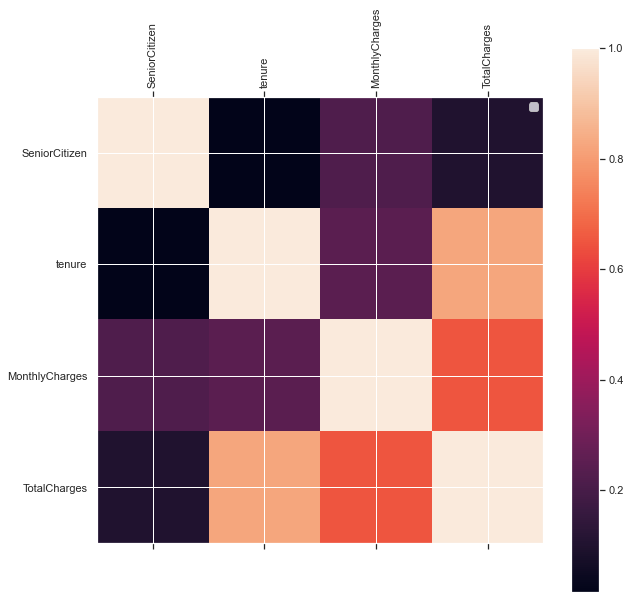

In [16]:
#Plotting a chart of the correlation matrix
def plot_corr(df, size=10):
    
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size,size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(df2)

### Preparing the dataset for Machine Learning

In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

#customer id col
id_col = ['customerID']

#Target columns
target_col = ["Churn"]

#categorical columns
cat_cols = df2.nunique()[df2.nunique() < 6].keys().tolist()
cat_cols = [x for x in cat_cols if x not in target_col]

#numerical columns
num_cols = [x for x in df2.columns if x not in cat_cols + target_col + id_col]

#Binary columns with 2 values
bin_cols = df2.nunique()[df2.nunique() == 2].keys().tolist()

#columns with more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#label encoding binary columns
le = LabelEncoder()
for i in bin_cols:
    df2[i] = le.fit_transform(df2[i])
    
df2 = pd.get_dummies(data = df2, columns = multi_cols)
df2.head()

<ipython-input-17-bf2ed4771009>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[i] = le.fit_transform(df2[i])


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [23]:
print(len(df2.columns))
print(num_cols)

41
['tenure', 'MonthlyCharges', 'TotalCharges']


In [19]:
#scaling Numerical columns
std = StandardScaler()

#scale data 
scaled = std.fit_transform(df2[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_telcom_og = df2.copy()
df2 = df2.drop(columns = num_cols, axis=1) #dropping the unscaled num_cols
df2 = df2.merge(scaled, left_index=True, right_index=True, how = "left")#merging the scaled num_cols to df2

#df2.info()
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,3668-QPYBK,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,-1.239504,0.196178,-0.940457


In [20]:
df2.drop(['customerID'], axis=1, inplace=True)
df2.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,-1.280248,-1.161694,-0.994194
1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,-1.239504,-0.363923,-0.959649
3,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,-1.239504,0.196178,-0.940457


In [21]:
df2[df2.isnull().any(axis=1)] #dropping null values

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
7032,1,1,0,0,1,1,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,NaN,NaN,NaN
7033,1,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,NaN,NaN,NaN
7034,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,NaN,NaN,NaN
7035,1,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,NaN,NaN,NaN
7036,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,NaN,NaN,NaN
7037,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,NaN,NaN,NaN
7038,1,0,1,1,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,NaN,NaN,NaN
7039,0,0,1,1,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,NaN,NaN,NaN
7040,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,NaN,NaN,NaN
7041,1,1,1,0,1,1,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,NaN,NaN,NaN


In [22]:
df2 = df2.dropna() #dropping nan values

In [26]:
df2.isnull().any(axis=1).value_counts()

False    7021
dtype: int64

### Modeling

In [27]:
from sklearn.model_selection import train_test_split

X = df2.drop(["Churn"], axis=1).values

y = df2["Churn"].values

In [28]:
#Split training data to a 70:30 ratio train:test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [29]:
type(X_train)

numpy.ndarray

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

model = LogisticRegression()
model.fit(X_train,y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print("Accuracy = " + str(score))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy = 0.7854769814902706
[[1379  161]
 [ 291  276]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1540
           1       0.63      0.49      0.55       567

    accuracy                           0.79      2107
   macro avg       0.73      0.69      0.70      2107
weighted avg       0.77      0.79      0.78      2107



## Feature importance using Logistic Regression

In [36]:
#viewing the features with the highest weights to determine those that mattered the most to our model
coef = model.coef_[0] #we have the 0 to make it a first order matrix
coef = [abs(number) for number in coef]
print(coef)

[0.13964448913854538, 0.2307666886114834, 0.24334116739912043, 0.07822457073840715, 0.11993031054825179, 0.3450652419255727, 0.0720189717198175, 0.11987075545782173, 0.0479113388284129, 0.3257550643142962, 0.3986850293848543, 0.0729895201609329, 0.3325877831122021, 0.0729895201609329, 0.2596578180416173, 0.30759192731883434, 0.0729895201609329, 0.23466196224825922, 0.07059512629652692, 0.0729895201609329, 0.002334838774042533, 0.23760294185198486, 0.0729895201609329, 0.164672976781435, 0.041732809791964615, 0.0729895201609329, 0.11466277486257725, 0.037664406154520005, 0.0729895201609329, 0.11059437122505877, 1.0996726877004015, 0.06048153115094557, 1.039250711639819, 0.07223423727175324, 0.28558004936398695, 0.25169226684283497, 0.10606246470250379, 0.03891322609360431, 0.07079549493592643, 0.0463589597904535]


In [37]:
cols = list(df2.columns)
cols.index('Churn')

6

In [38]:
del cols[6]
cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'tenure',
 'MonthlyCharges',
 'Tota

In [40]:
sorted_index = sorted(range(len(coef)), key = lambda k: coef[k], reverse = True)
print(sorted_index)

for a in sorted_index:
    print(cols[a])

[30, 32, 10, 5, 12, 9, 15, 34, 14, 35, 2, 21, 17, 1, 23, 0, 4, 7, 26, 29, 36, 3, 11, 13, 16, 19, 22, 25, 28, 33, 6, 38, 18, 31, 8, 39, 24, 37, 27, 20]
Contract_Month-to-month
Contract_Two year
InternetService_Fiber optic
PaperlessBilling
OnlineSecurity_No
InternetService_DSL
OnlineBackup_No
PaymentMethod_Credit card (automatic)
OnlineSecurity_Yes
PaymentMethod_Electronic check
Partner
TechSupport_No
OnlineBackup_Yes
SeniorCitizen
TechSupport_Yes
gender
PhoneService
MultipleLines_No phone service
StreamingTV_Yes
StreamingMovies_Yes
PaymentMethod_Mailed check
Dependents
InternetService_No
OnlineSecurity_No internet service
OnlineBackup_No internet service
DeviceProtection_No internet service
TechSupport_No internet service
StreamingTV_No internet service
StreamingMovies_No internet service
PaymentMethod_Bank transfer (automatic)
MultipleLines_No
MonthlyCharges
DeviceProtection_No
Contract_One year
MultipleLines_Yes
TotalCharges
StreamingTV_No
tenure
StreamingMovies_No
DeviceProtection_Ye

## Using Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

predictions = model_rf.predict(X_test)
score = model_rf.score(X_test, y_test)

print("Accuracy = " + str(score))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy = 0.7702895111532986
[[1359  181]
 [ 303  264]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1540
           1       0.59      0.47      0.52       567

    accuracy                           0.77      2107
   macro avg       0.71      0.67      0.69      2107
weighted avg       0.76      0.77      0.76      2107



## Using Deep Learning

In [43]:
%tensorflow_version 2.x

UsageError: Line magic function `%tensorflow_version` not found.


In [45]:
import tensorflow as tf

#testing to ensure we are using our GPU
tf.test.gpu_device_name()

''

In [47]:
#Creating a simple model
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(20, kernel_initializer = "uniform", activation = "relu", input_dim=40))
model.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))

model.compile(optimizer = "adam", loss="binary_crossentropy", metrics = ["accuracy"])

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                820       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 841
Trainable params: 841
Non-trainable params: 0
_________________________________________________________________


In [49]:
batch_size = 64
epochs = 25

history = model.fit(X_train,
                   y_train, 
                   batch_size = batch_size,
                   epochs = epochs,
                   verbose = 1,
                   validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Epoch 1/25
77/77 [==============================] - 1s 4ms/step - loss: 0.6108 - accuracy: 0.7334 - val_loss: 0.5238 - val_accuracy: 0.7309
Epoch 2/25
77/77 [==============================] - 0s 2ms/step - loss: 0.4809 - accuracy: 0.7495 - val_loss: 0.4557 - val_accuracy: 0.7679
Epoch 3/25
77/77 [==============================] - 0s 2ms/step - loss: 0.4504 - accuracy: 0.7829 - val_loss: 0.4448 - val_accuracy: 0.7826
Epoch 4/25
77/77 [==============================] - 0s 2ms/step - loss: 0.4424 - accuracy: 0.7869 - val_loss: 0.4386 - val_accuracy: 0.7845
Epoch 5/25
77/77 [==============================] - 0s 2ms/step - loss: 0.4395 - accuracy: 0.7888 - val_loss: 0.4370 - val_accuracy: 0.7855
Epoch 6/25
77/77 [==============================] - 0s 2ms/step - loss: 0.4375 - accuracy: 0.7894 - val_loss: 0.4360 - val_accuracy: 0.7864
Epoch 7/25
77/77 [==============================] - 0s 2ms/step - loss: 0.4363 - accuracy: 0.7904 - val_loss: 0.4347 - val_accuracy: 0.7850
Epoch 8/25
77/77 [==